## Assignment Statement

One simple test to determine whether a random number generator is giving random values from a distribution with distribution function $F(x)$ is that of Kolmogorov and Smirnov. 

Using the random number generator, obtain a sample of size $n$. 

Order the sample with $x_r$ being the $r$th smallest observation. 

Define the sample distribution function $S_n$ to be $$ S_n(x) = \begin{cases} 0 \text{ for } x < x_{(1)} \\ \frac{r}{n} \text{ for } x_{(r)} \leq x < x_{(r+1)} \\ 1 \text{ for } x_{(n)} \leq x \end{cases}$$

Then, for $n$ larger than $80$, it can be shown that if the $x$'s are truly coming from $F$, then, with probability $0.99$, $$ \text{sup}_x \vert S_n(x) - F(x) \vert < \dfrac{1.6276}{\sqrt{n}}.$$

Use the random number generator, $X_{n+1} = 7^5 X_n \text{mod}(2^{31} -1)$, to generate a sample of size $1,000$ from the uniform distribution on the unit interval.

Does your sample pass the Kolmogorov-Smirnov test?

## Assignment Minimal Requirements

### Imports

In [144]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

### Generate Data

In [2]:
# Declare the values for the random number generator.
increment = 0
multiplier = 7**5
modulus = (2**31)-1
number_of_iterations = 1000

# The seed value is not explicitly provided, so I'll start with 1.
seed_value = 1

In [32]:
# We create our starting lists
values = [seed_value]

function_values = []
scaled_ordered_values = []
uniform_values = []
step_function_levels = []

# I want to create an index list for the dataframe.
index_list = np.arange(1, number_of_iterations + 1)

In [33]:
# Generate the random number generated values.
for _ in range(number_of_iterations):

    # Calculate the next value.
    next_value = (multiplier * values[-1] + increment) % modulus

    # Store the value to the list.
    values.append(next_value)

# We now have 1001 values, including our seed value.
# We drop the seed value, which is currently the first one in the list, leaving us with the 1,000 we wanted.
values.pop(0)

# We put the values in order
ordered_values = sorted(values)

# To scale the values to be on the unit inverval, I will divide through by the modulus.
for number in ordered_values:
    scaled_value = number/modulus
    scaled_ordered_values.append(scaled_value)

# We generate values from the theoretical distribution.
uniform_values = np.random.uniform(0,1,number_of_iterations)

# Sort the uniform values.
sorted_uniform_values = sorted(uniform_values)

# Create the S values.
for i in range(number_of_iterations):
    step_value = (i+1) / number_of_iterations
    step_function_levels.append(step_value)

# We'll need to find the absolute value of the differences for the S and F so that we can find the supremum / max of those.
differences = [abs(s - f) for s, f in zip(scaled_ordered_values, sorted_uniform_values)]

In [62]:
# Create a DataFrame with the ordered values and their corresponding S_n(x) values
df = pd.DataFrame({
    'Index': index_list,
    'X': scaled_ordered_values,
    'S': step_function_levels,
    'F': sorted_uniform_values,
    'Difference': differences
})

df

## As an intermediary step, I want to plot the results and verify that it looks like the CDF for a uniform distribution, which should roughly have the shape of a right triangle with the 90-degree angle on the bottom right.

### We plot the S values.

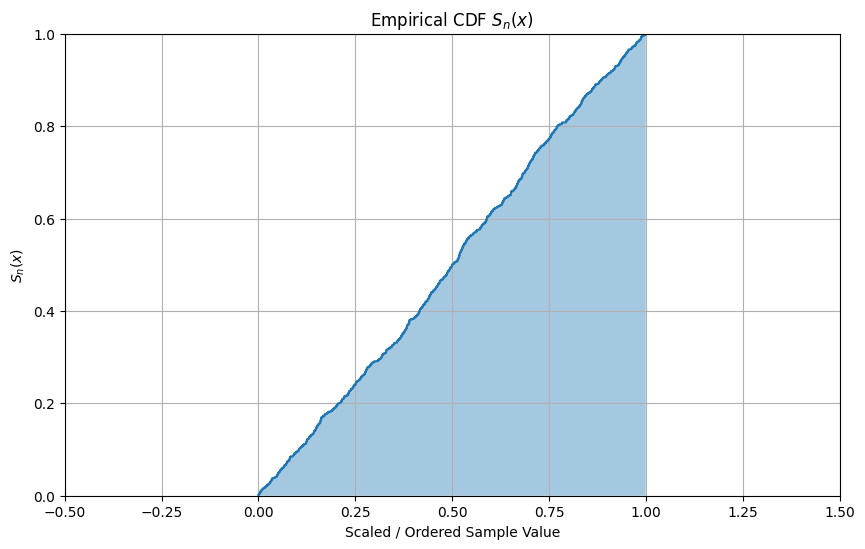

In [59]:
# Plotting the step function for S
plt.figure(figsize=(10, 6))

# We adjust the plot limits so that we make sure we can see the whole shape.
plt.xlim(-0.5, 1.5)
plt.ylim(0, 1)

# We plot the step function with the space under S filled in.
plt.step(df['X'], df['S'], where='post', label='Empirical CDF $S_n(x)$')
plt.fill_between(df['X'], df['S'], step="post", alpha=0.4)

# We label the axes and the plot itself.
plt.xlabel('Scaled / Ordered Sample Value')
plt.ylabel('$S_n(x)$')
plt.title('Empirical CDF $S_n(x)$')
plt.grid(True)

# Display the plot
plt.show()

### The plot of a Uniform(0,1) CDF.

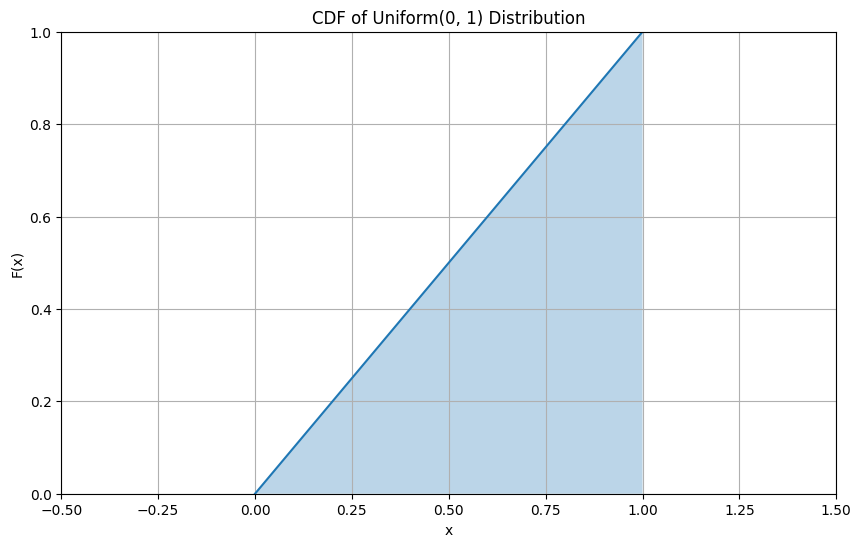

In [65]:
# Plotting the step function for S
plt.figure(figsize=(10, 6))

# We adjust the plot limits so that we make sure we can see the whole shape.
plt.xlim(-0.5, 1.5)
plt.ylim(0, 1)

# Generate our x values.
x = np.linspace(0, 1, 1000)

# Since the CDF of a uniform distribution is F(x) = x for 0 <= x <= 1
cdf = x

# Plot the function and fill beneath.
plt.plot(x, cdf, label='CDF for Uniform(0, 1)')
plt.fill_between(x, 0, cdf, alpha=0.3)

# We label the axes and the plot itself.
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF of Uniform(0, 1) Distribution')
plt.grid(True)

plt.show()

They do look roughy the same, though obviously with a different scale.

### Find if $\text{sup}_x \vert S_n(x) - F(x) \vert < \dfrac{1.6276}{\sqrt{n}}$

In [70]:
check_value = (1.6276)/(number_of_iterations**(1/2))
print(check_value)

0.05146923119690054


In [71]:
supremum = max(df['Difference'])
print(supremum)

0.04322838604234547


In [72]:
print(supremum < check_value)

True


We get a value of 'True' from above, and therefore the Kolmogorov-Smirnov test indicates that there is no statistically significant difference between the two distributions.

# Additional Requirements

## Does the random number generator generate a uniform distribution on the unit interval?

### Image

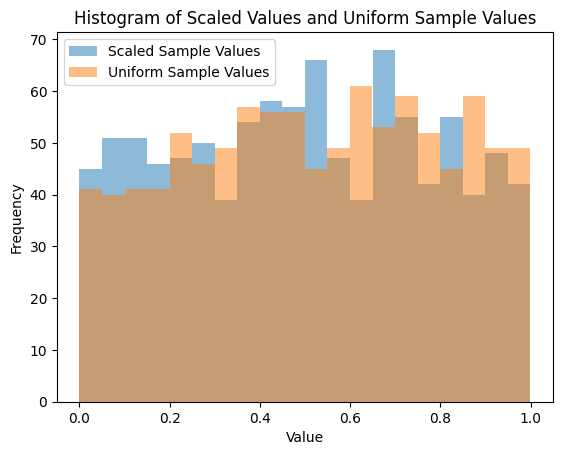

In [80]:
# Generate histograms
plt.hist(df['X'], bins=20, alpha=0.5, label='Scaled Sample Values')
plt.hist(df['F'], bins=20, alpha=0.5, label='Uniform Sample Values')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Scaled Values and Uniform Sample Values')
plt.legend()

# Display the plot
plt.show()


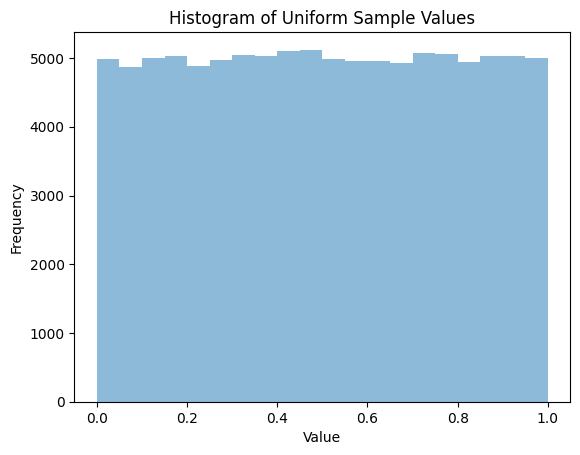

In [82]:
# Generate a separate, larger sample of U(0,1) values.
separate_uniform_values = np.random.uniform(0, 1, 100000)

# Generate histograms
plt.hist(separate_uniform_values, bins=20, alpha=0.5, label='Uniform Sample Values')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Uniform Sample Values')

# Display the plot
plt.show()


### Expected Value and Variance

In [85]:
# The known analytic values for mean and variance of U(0,1)
known_uniform_mean = 0.5
known_uniform_variance = 1/12

# Sample mean and variance
sample_mean_value = np.mean(df['X'])
sample_variance_value = np.var(df['X'])

# Sample statistic results.
print(f"Mean of the scaled sample values: {mean_value}")
print(f"Variance of the scaled sample values: {variance_value}")

# Differences between the sample statistics and analytic values.
print(f"The absolute difference between the sample mean and analytical mean: {abs(known_uniform_mean - sample_mean_value)}")
print(f"This is difference of {(abs(known_uniform_mean - sample_mean_value))/known_uniform_mean} percent of the actual value.")

print(f"The absolute difference between the sample variance and analytical variance: {abs(known_uniform_variance - sample_variance_value)}")
print(f"This is difference of {(abs(known_uniform_variance - sample_variance_value))/known_uniform_variance} percent of the actual value.")

Mean of the scaled sample values: 0.49796137935387036
Variance of the scaled sample values: 0.07874879765754639
The absolute difference between the sample mean and analytical mean: 0.0020386206461296408
This is difference of 0.0040772412922592816 percent of the actual value.
The absolute difference between the sample variance and analytical variance: 0.004584535675786941
This is difference of 0.05501442810944329 percent of the actual value.


### Use In a MC Simulation With Known Result

Another way to test if our samples are from our uniform distribution would be a kind of 'unit test', where we use our values in an alorithm that already has a known result.

In an earlier exercise for this course, we had the following objective:

Use simulation to approximate the integral $\int\limits_0^\infty x(1+x^2)^{-2} dx$.

Our algorithm for this process is as follows:
1. Generate $y \sim U(0,1)$
2. Evaluate $h(y) = ( \frac{1}{y} - 1)(1 + (\frac{1}{y} - 1)^2)^{-2} (\frac{1}{y^2})$
3. Repeat steps 1 and 2 a total of $n$ times, for $n$ large.
4. Find $\dfrac{\sum h(y_i)}{n} \dot\sim \int_0^\infty x(1+x^2)^{-2} dx$

Here, our '$n$ large' would just be the number of samples / iterations of our random number generators. That is, $1000$.

I'll run the above algorithm with $n=1000$ for $10,000$ trials. By the CLT, we can use those trial results to generate the theoretical average and standard deviation values for samples drawn of $n=1000$.

We can then run the scaled samples of our random number generator through the algorithm and find that value.

We will then use a $Z$ test, at $\alpha = 0.05$, to test if our sample deviates from that of the theoretical distribution generated by the repeated trials.

I'll note here that $\alpha=0.05$ is being used as a baseline, but is somewhat arbitrary. If a high-risk or critically important process depended on the sample values, I would use a smaller $\alpha$ to guarantee a higher level of accuracy for the number generator.

First, we define our functions.

In [87]:
def monte_carlo_integration(function, number_of_samples):
    # Draw the prescribed number of random samples from a uniform distribution U(0,1).
    samples = np.random.uniform(0,1,number_of_samples)

    # Evaluate the function for each of the drawn values.
    function_values = function(samples)

    # Take the average of the function values.
    integral_estimate = np.sum(function_values)/number_of_samples

    return integral_estimate

In [88]:
# This is our transformed integral - it needs to have bounds of 0 and 1.
def integral(y):
    return ((1/y - 1)*(1 + (1/y - 1)**2)**(-2))*(1/y**2)

In [136]:
def run_trials(number_of_rounds):
    for _ in range(number_of_rounds):
        trial_result = monte_carlo_integration_result = monte_carlo_integration(integral, number_of_samples)
        trial_results.append(trial_result)

In [160]:
def monte_carlo_from_sample(original_sample_results, function):
    # Draw the prescribed number of random samples from a uniform distribution U(0,1).
    samples = original_sample_results

    # Evaluate the function for each of the drawn values.
    function_values = function(samples)

    # Take the average of the function values.
    integral_estimate = np.sum(function_values)/len(samples)

    return integral_estimate

Next, we set our variables, intitialize our trial results list, and generate our values.

In [191]:
number_of_samples = 1000
number_of_rounds = 10000

In [192]:
trial_results = []

In [193]:
run_trials(number_of_rounds)
sample_generated_result = monte_carlo_from_sample(df['X'], integral)

In [194]:
trial_results_mean = np.mean(trial_results)
trial_results_standard_deviation = np.sqrt(np.var(trial_results))

We can compute some results.

In [208]:
# Calculate Quartile Values
Min = min(trial_results)
Q1 = np.percentile(trial_results, 25)
Q2 = np.percentile(trial_results, 50)
Q3 = np.percentile(trial_results, 75)
Max = max(trial_results)

# Print quartile values
print(f"Minimum: {Min}")
print(f"First quartile (Q1): {Q1}")
print(f"Second quartile (Median, Q2): {Q2}")
print(f"Third quartile (Q3): {Q3}")
print(f"Maximum: {Max}")

print("\n")

# 95th Percentile and Sample Generated Result value
ninety_fifth_percentile_value = np.percentile(trial_results, 95)
print(f"The 95th Percentile: {ninety_fifth_percentile_value}")
print(f"The Sample Value: {sample_generated_result}")

Minimum: 0.4614629348629908
First quartile (Q1): 0.4927920001383537
Second quartile (Median, Q2): 0.5002363238959706
Third quartile (Q3): 0.5074907874105098
Maximum: 0.5351464497495539


The 95th Percentile: 0.5173483131984175
The Sample Value: 0.523517872740267


We compute the Z score for our RNG generated sample integration result.

In [209]:
# Calculate the Z score

# Population parameters
population_mean = trial_results_mean
population_standard_deviation = trial_results_standard_deviation

# Calculate the Z-score
Z = (sample_generated_result - population_mean) / population_standard_deviation

print(f"Z-score: {Z}")

Z-score: 2.194246804669098


Let's look at these on a plot.

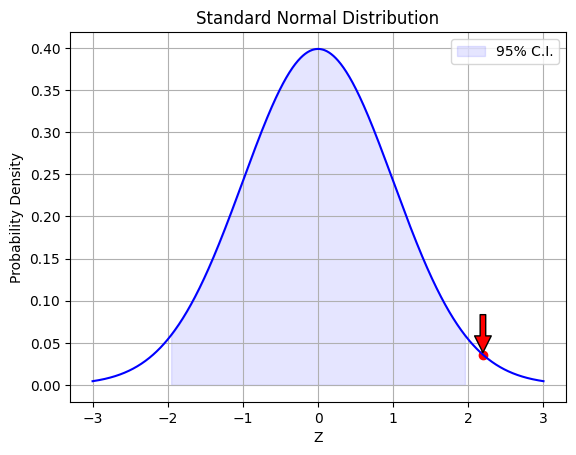

In [210]:
# We will generate a plot of a standard normal distribution.
mean = 0
std_dev = 1
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x, mean, std_dev)
plt.plot(x, y, color='blue')

# Z-score to highlight on the plot
Z_value = Z
y_value = norm.pdf(Z_value, mean, std_dev)

# Mark the Z-value on the plot and fill in the 95% confidence interval.
plt.scatter(Z_value, y_value, color='red')
plt.fill_between(x, y, where=(x >= -1.96) & (x <= 1.96), color='blue', alpha=0.1, label='95% C.I.')

# Optionally, you can use an arrow to annotate the Z-value
plt.annotate('',xy=(Z_value, y_value), xytext=(Z_value, y_value + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')

# Plot values.
plt.title('Standard Normal Distribution')
plt.xlabel('Z')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

Using this approach, I generated a $Z$-score of roughly $2.5$, for which we would **reject** the null hypothesis. If I have done this test right, this indicates that the pseudo-random values generated by our random number generator, when used for the simulated integration approach for this exercise, have given us statistically significantly different results.

# Conclusion

Given that I can only generate 1,000 samples at a time from this random number generator, I will make the following observations:
1. The sample passes the Kolmogorov-Smirnov test.
2. The CDF of the scaled samples appears to be roughly the same as the CDF of $U(0,1)$.
3. The histograms look roughly similar for the RNG sample and the $U(0,1)$ samples.
4. The expected value and variance values appear to be close to the theoretical values.

For these reasons, it seems likely that we can consider the random numbers (scaled to the unit interval) roughly uniformly distributed.

However, when used in application, we got an integral value that was outside of the 95th percentile range of the implied population distribution.

For 'further steps' before trusting this RNG, I would want to verify with another statistician that I haven't made any assumptions or errors in my unit test (the integration procedure).

Assuming I haven't made any errors, I actually don't think that I would trust this RNG over the numpy implemented generator in any industrial context, unless there was some compelling reason to do so. (Though, I might do another round of unit tests within the context of that problem.)